#### Imports

In [26]:
# TODO: check mnist data research paper

import sys
sys.path.insert(0, '../package')

from package import *

def scale_data(train, test=''):    # Also adding scaling function.
    scaler = StandardScaler()

    train_data = scaler.fit_transform(train)
    
    if type(test) != str:
        test_data = scaler.transform(test)
        return train_data, test_data
    else:
        return train_data

display(dataset)


,Unnamed: 0,Team,League,Year,OBP,SLG,BA,Playoffs,ERA,ERA+,FIP,HR,RBIs,Ks,RC
0,1231,WSA,AL,1962,0.308,0.373,0.250,0,4.04,101,4.18,132,566,771,631.954286
1,1230,STL,NL,1962,0.335,0.394,0.271,0,3.55,121,3.81,137,707,914,737.178629
2,1229,SFG,NL,1962,0.341,0.441,0.278,1,3.79,101,3.81,204,807,886,836.315660
3,1228,PIT,NL,1962,0.321,0.394,0.268,0,3.37,117,3.46,108,655,897,694.471682
4,1227,PHI,NL,1962,0.330,0.390,0.260,0,4.28,91,4.13,142,658,863,689.183835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,1467,WSN,NaN,2021,0.337,0.417,0.258,1,4.80,84,4.87,182,686,1346,744.079320
1468,1468,PIT,NaN,2021,0.309,0.364,0.236,1,5.08,84,4.74,124,570,1312,744.079320
1469,1469,TEX,NaN,2021,0.294,0.375,0.232,1,4.79,92,4.76,167,598,1239,744.079320
1470,1470,BAL,NaN,2021,0.304,0.402,0.239,1,5.84,77,5.15,195,632,1234,744.079320


### Prepare data for simulation

In [27]:
target = (dataset['Playoffs'])
data_moneyball = (dataset[['OBP', 'SLG', 'FIP', 'RC']])    # chosing these stats because these are valued most.

display(target)
display(data_moneyball) 

# ---- VARIABLE DESCRIPTIONS ----
# OBP:          on-base percentage
# SLG:          slugging percentage
# FIP:          fielding independent pitching
# RC:           runs created
# Playoffs:     binary (if team made playoffs or not)

target = target.to_numpy()
data_moneyball = data_moneyball.to_numpy()


0       0
1       0
2       1
3       0
4       0
       ..
1467    1
1468    1
1469    1
1470    1
1471    1
Name: Playoffs, Length: 1472, dtype: int64

,OBP,SLG,FIP,RC
0,0.308,0.373,4.18,631.954286
1,0.335,0.394,3.81,737.178629
2,0.341,0.441,3.81,836.315660
3,0.321,0.394,3.46,694.471682
4,0.330,0.390,4.13,689.183835
...,...,...,...,...
1467,0.337,0.417,4.87,744.079320
1468,0.309,0.364,4.74,744.079320
1469,0.294,0.375,4.76,744.079320
1470,0.304,0.402,5.15,744.079320


#### Split up data

X_train.shape: (1104, 4); y_train.shape: (1104,)
X_test.shape: (368, 4); y_test.shape: (368,)


Text(0.5, 0, 'RC')

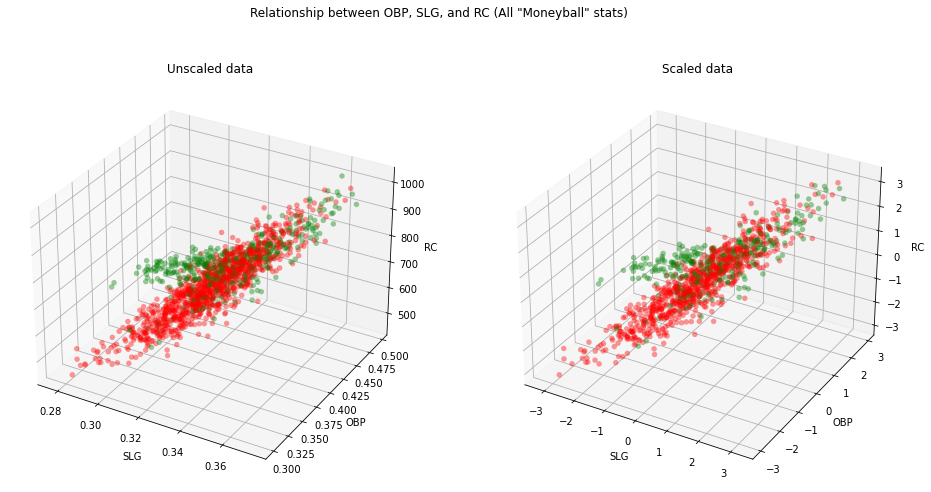

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data_moneyball, target, stratify=target)

X_train, X_test = scale_data(X_train, X_test)
        

print(f'X_train.shape: {X_train.shape}; y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}; y_test.shape: {y_test.shape}')

# Plot the data
fig = plt.figure(figsize=(16, 8))
    
title = fig.suptitle(f'Relationship between OBP, SLG, and RC (All "Moneyball" stats)')
axs_1 = fig.add_subplot(1, 2, 1, projection='3d')
axs_1.title.set_text('Unscaled data')

xs = data_moneyball[:, 0]    # SLG
ys = data_moneyball[:, 1]    # OBP
zs = data_moneyball[:, 3]    # RC
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['green' if tar == 1 else 'red' for tar in target]

for data, color in zip(data_points, colors):
    x, y, z = data
    axs_1.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

axs_1.set_xlabel('SLG')
axs_1.set_ylabel('OBP')
axs_1.set_zlabel('RC')

# Plot the scaled data.
axs_2 = fig.add_subplot(1, 2, 2, projection='3d')
axs_2.title.set_text('Scaled data')

xs = X_train[:, 0]    # SLG
ys = X_train[:, 1]    # OBP
zs = X_train[:, 3]    # RC
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['green' if tar == 1 else 'red' for tar in y_train]

for data, color in zip(data_points, colors):
    x, y, z = data
    axs_2.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

axs_2.set_xlabel('SLG')
axs_2.set_ylabel('OBP')
axs_2.set_zlabel('RC')


#### Create model

In [29]:
moneyball_model = LogisticRegression(max_iter=999999999)
moneyball_model.fit(X_train, y_train)

print(f'Training Accuracy: {moneyball_model.score(X_train, y_train)*100:.2f}%')
print(f'Testing Accuracy: {moneyball_model.score(X_test, y_test)*100:.2f}%')


Training Accuracy: 77.17%
Testing Accuracy: 76.36%


#### Test model for different eras

In [30]:
def time_period_test(year, symbol):
    if symbol == '<':
        dataset_time_period = dataset.loc[dataset['Year'] < year]
    elif symbol == '>':
        dataset_time_period = dataset.loc[dataset['Year'] > year]
    else:
        print(f"Invalid symbol '{symbol}'")

    data_time_period = (dataset_time_period[['SLG', 'OBP', 'RC', 'FIP']]).to_numpy()
    target_time_period = (dataset_time_period['Playoffs']).to_numpy()

    data_time_period = data_time_period

    X_train, X_test, y_train, y_test = train_test_split(data_time_period, target_time_period)

    X_train, X_test = scale_data(X_train, X_test)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)

    accuracy_train = model.score(X_train, y_train)*100
    accuracy_test = model.score(X_test, y_test)*100

    fig = plt.figure(figsize=(10, 8))
    
    title = fig.suptitle(f'Statistics from {symbol} {year}\n Train accuracy: {accuracy_train:.1f}% \n Test accuracy: {accuracy_test:.1f}%')
    ax = fig.add_subplot(111, projection='3d')

    xs = X_train[:, 0]    # SLG
    ys = X_train[:, 1]    # OBP
    zs = X_train[:, 2]    # RC
    data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
    colors = ['green' if tar == 1 else 'red' for tar in target_time_period]

    for data, color in zip(data_points, colors):
        x, y, z = data
        ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)
    
    ax.set_xlabel('SLG')
    ax.set_ylabel('OBP')
    ax.set_zlabel('RC')


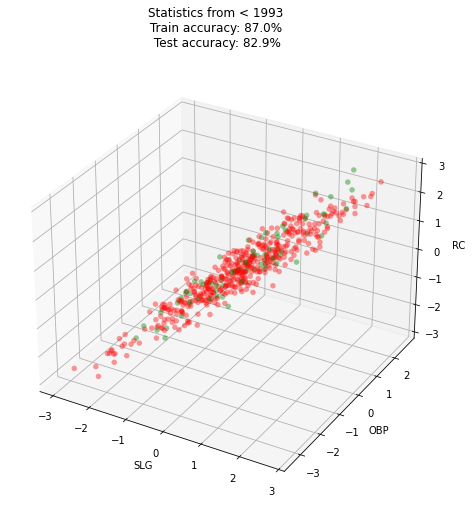

In [31]:
time_period_test(1993, '<')

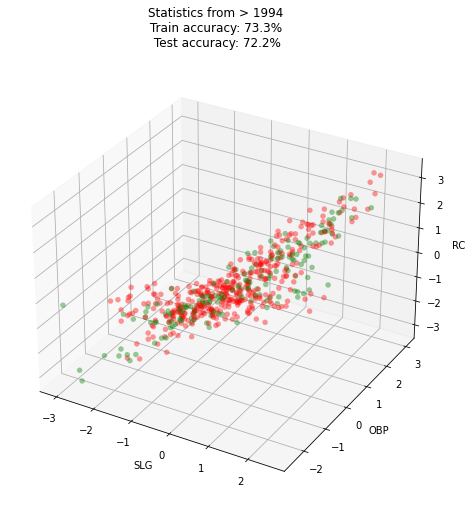

In [32]:
time_period_test(1994, '>')

#### Checking weight importances

In [33]:
def get_variable_weights(weights, feautres):
    weights = [abs(round(weight, 3)) for weight in weights]
    features_plus_weights = [(feature,  weight) for feature, weight in zip(features, weights)]
    features_plus_weights = sorted(features_plus_weights, key=lambda i: abs(i[1]-1))

    print('\nWeight importance (sorted by closest to 1 i.e. linear correlation):')
    print(features_plus_weights)


weights = moneyball_model.coef_[0]
features = ['OBP', 'SLG', 'FIP', 'RC']

get_variable_weights(weights, features)

# NOTE: we are sorting the weights the closer they are to one (closer they are, more correlation).



Weight importance (sorted by closest to 1 i.e. linear correlation):
[('OBP', 1.186), ('FIP', 0.741), ('SLG', 0.38), ('RC', 2.599)]


#### Adding confusion matrix

In [34]:
confusion_matrix(y_test, moneyball_model.predict(X_test))

# NOTE: (129 + 30) / 1472 ≈ 10% of all teams EVER have made the playoffs i.e. only 

# TODO: update this note before publishing.

array([[237,  28],
       [ 59,  44]], dtype=int64)

#### Make manual test to see if a team would make the playoffs

In [35]:
def manual_test(team, year):
    team_object = Teams(year)[team]

    team_OBP = team_object.on_base_percentage
    team_SLG = team_object.slugging_percentage
    team_FIP = team_object.fielding_independent_pitching
    team_RC = (team_object.hits + team_object.bases_on_balls) * team_object.total_bases / (team_object.at_bats + team_object.bases_on_balls)

    sample = [team_OBP, team_SLG, team_FIP, team_RC]
    sample = np.array(sample).reshape(1, -1)
    _, sample = scale_data(data_moneyball, sample)    # Reinitializing scaler to scale sample.
    
    return f'Model prediction for {year} {team_object.abbreviation}: {moneyball_model.predict(sample)[0]}'

for year in [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021]:    # Skip 2020 (COVID year with only 60 games)
    print(manual_test('CHC', year))

# NOTE: The reason why this may be is because only 30/338 ≈ 9% of predictions are projected to make the playoffs.
#       Only the LEGENDARY teams make the playoffs... ?


Model prediction for 2013 CHC: 0
Model prediction for 2014 CHC: 0
Model prediction for 2015 CHC: 0
Model prediction for 2016 CHC: 0
Model prediction for 2017 CHC: 0
Model prediction for 2018 CHC: 0
Model prediction for 2019 CHC: 0
Model prediction for 2021 CHC: 0


In [36]:
print(manual_test('LAD', 2016))    # Won 91 games
print(manual_test('CLE', 2016))    # Won 94 games
print(manual_test('CIN', 1975))    # Won 108 games
print(manual_test('SEA', 2001))    # Won 116 games (record for most in regular season)
print(manual_test('NYY', 1998))    # Won 114 games
print(manual_test('BOS', 2018))    # Won 108 games


Model prediction for 2016 LAD: 0
Model prediction for 2016 CLE: 0
Model prediction for 1975 CIN: 0
Model prediction for 2001 SEA: 1
Model prediction for 1998 NYY: 1
Model prediction for 2018 BOS: 1
